In [1]:
import pandas as pd

from torch.utils.data import DataLoader
from torchvision import transforms

from src.datasets import Tox21Dataset
from src.transforms import SMILESToMol, MolToGreyscale
from src.target_transforms import BinaryToxicity
from src.utils import plot_greyscale

In [2]:
df = pd.read_csv("../data/tox21_data.csv")
print(df.shape)
df.head()

(7817, 14)


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O


In [3]:
transform = transforms.Compose(
    [
        SMILESToMol(),
        MolToGreyscale(embed=19, res=0.4),
        # transforms.Normalize(),  # need to standardise somehow
        BinaryToxicity(),
    ]
)

In [4]:
tox21 = Tox21Dataset(csv_path="../data/tox21_raw.csv", transform=transform)

In [5]:
tox21.remove_nan()
len(tox21)

7817

In [6]:
dataloader = DataLoader(tox21, batch_size=2, shuffle=True)

In [7]:
# use a generator to get the first batch
dataloader_iter = iter(dataloader)
batch = next(dataloader_iter)
arr, labels = batch
print(arr.shape, labels)

torch.Size([2, 95, 95, 1]) tensor([0, 1])


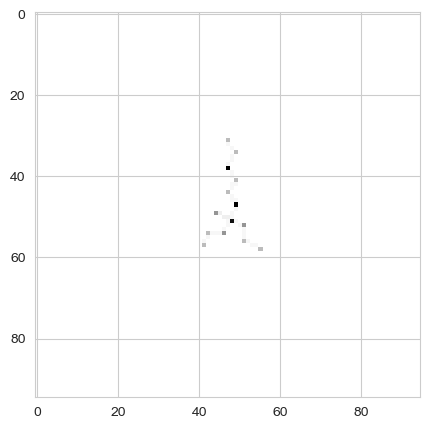

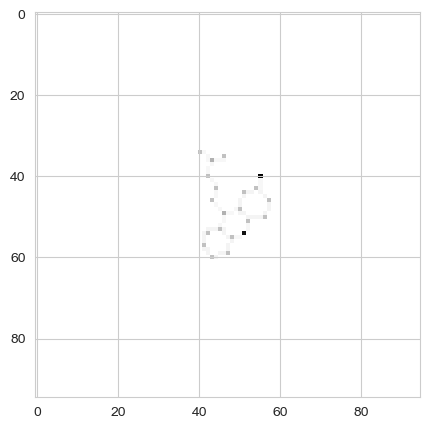

In [8]:
plot_greyscale(arr)